### Import neccessary libraries

In [227]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use("dark_background")
from IPython import display

### Load dataset

In [228]:
iris=sns.load_dataset('iris')
iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [229]:
iris.shape

(150, 5)

In [230]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [231]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [232]:
iris.duplicated().sum()

1

In [233]:
iris.drop_duplicates(inplace=True)

In [234]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [235]:
iris["species"].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [236]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [237]:
# Label Encoder
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
iris['species']=labelencoder.fit_transform(iris['species'])

In [238]:
iris['species']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 149, dtype: int32

In [239]:
iris['species'].value_counts()

0    50
1    50
2    49
Name: species, dtype: int64

In [240]:
iris["species"]

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 149, dtype: int32

In [241]:
# Assign all features to X and target column as y
# Divide the data into train and test
X = iris.drop(columns=["species"])
y = iris["species"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [242]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [243]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [244]:
X_train.shape

(119, 4)

In [245]:
# Lets us make uniform scaling of all features 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

In [246]:
# One-hot encode the target labels
y_train_encoded = to_categorical(y_train, num_classes=3)
y_test_encoded = to_categorical(y_test, num_classes=3)

### ANN model

In [249]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [250]:
# Define the model
model = Sequential()
model.add(Dense(11, activation="relu", input_dim=4))
model.add(Dense(11, activation="relu"))
model.add(Dense(3, activation='softmax'))  # Use softmax for multi-class classification

In [251]:
model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_53 (Dense)            (None, 11)                55        
                                                                 
 dense_54 (Dense)            (None, 11)                132       
                                                                 
 dense_55 (Dense)            (None, 3)                 36        
                                                                 
Total params: 223 (892.00 Byte)
Trainable params: 223 (892.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [252]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [253]:
# Train the model
history = model.fit(X_train_trf, y_train_encoded, epochs=10)

Epoch 1/10
4/4 [==============================] - 1s 11ms/step - loss: 1.1168 - accuracy: 0.3445
Epoch 2/10
4/4 [==============================] - 0s 9ms/step - loss: 1.1035 - accuracy: 0.3613
Epoch 3/10
4/4 [==============================] - 0s 8ms/step - loss: 1.0895 - accuracy: 0.3950
Epoch 4/10
4/4 [==============================] - 0s 5ms/step - loss: 1.0746 - accuracy: 0.4202
Epoch 5/10
4/4 [==============================] - 0s 5ms/step - loss: 1.0603 - accuracy: 0.4202
Epoch 6/10
4/4 [==============================] - 0s 6ms/step - loss: 1.0454 - accuracy: 0.4454
Epoch 7/10
4/4 [==============================] - 0s 11ms/step - loss: 1.0295 - accuracy: 0.4790
Epoch 8/10
4/4 [==============================] - 0s 11ms/step - loss: 1.0126 - accuracy: 0.5210
Epoch 9/10
4/4 [==============================] - 0s 7ms/step - loss: 0.9957 - accuracy: 0.5462
Epoch 10/10
4/4 [==============================] - 0s 7ms/step - loss: 0.9778 - accuracy: 0.5630


In [254]:
# Predict the class probabilities
y_log = model.predict(X_test_trf)

# Convert probabilities to class labels
y_pred = np.argmax(y_log, axis=1)

print(y_pred)

1/1 [==============================] - 0s 125ms/step
[1 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 0 0 0 0 1 0 2 1 1 0 0 1]


In [255]:
model.layers[0].get_weights()

[array([[-0.11693245,  0.28098768,  0.17095074, -0.07787486,  0.28475848,
         -0.5155509 ,  0.6560384 , -0.2569054 , -0.6211713 , -0.41679928,
         -0.1434986 ],
        [-0.53279185,  0.24113965, -0.09567976, -0.44601002,  0.38239673,
         -0.21034454,  0.25975037, -0.1419975 , -0.22940612, -0.0277395 ,
          0.60487056],
        [-0.2710475 ,  0.17161758,  0.15341352,  0.2936715 , -0.5306211 ,
         -0.23000917, -0.18632145,  0.21916597,  0.31811005,  0.5555874 ,
         -0.547142  ],
        [-0.08964843, -0.5964631 , -0.27717766, -0.566146  ,  0.33691317,
          0.36230525,  0.465214  ,  0.151685  ,  0.1528512 ,  0.1963747 ,
          0.21242541]], dtype=float32),
 array([-0.03206876,  0.03932831, -0.00772063, -0.03416687,  0.03580292,
        -0.01287922,  0.03560624,  0.01800938,  0.03057254,  0.03505034,
         0.04182546], dtype=float32)]

In [256]:
model.layers[1].get_weights()

[array([[-1.14851423e-01, -2.11797342e-01,  1.91659138e-01,
          4.81809676e-01, -1.31867528e-01,  1.06995091e-01,
          1.61237404e-01,  4.39219549e-03, -8.04301500e-02,
          1.15569867e-01,  4.53911752e-01],
        [ 1.58310801e-01, -9.81977209e-02, -4.82448041e-01,
          4.74607572e-02,  4.87930238e-01,  1.48436889e-01,
          4.69788313e-01,  6.31480590e-02,  1.91344798e-01,
         -8.93616155e-02,  5.18666267e-01],
        [ 1.35156855e-01, -4.01372164e-01, -1.45166308e-01,
          3.76829691e-02, -4.34168667e-01, -8.04217309e-02,
         -1.83682382e-01, -3.66266042e-01, -9.18000937e-02,
          5.37804067e-01,  1.94343135e-01],
        [ 4.54914451e-01, -4.54106450e-01,  4.90239859e-01,
          3.80669624e-01, -3.28810215e-01, -1.22119464e-01,
          4.19192314e-01, -2.85649776e-01, -3.43879648e-02,
         -4.70733076e-01,  2.59890467e-01],
        [-4.15628314e-01, -2.39358976e-01,  4.91023064e-01,
         -1.00297824e-01, -1.72703192e-01, -

In [132]:
y_log=model.predict(X_test_trf)

1/1 [==============================] - 0s 91ms/step


In [257]:
y_log

array([[0.28262392, 0.39907646, 0.3182996 ],
       [0.25949323, 0.3750067 , 0.3655001 ],
       [0.2754381 , 0.45882422, 0.26573765],
       [0.28921878, 0.3816867 , 0.32909447],
       [0.4647404 , 0.245117  , 0.2901426 ],
       [0.23622152, 0.43959722, 0.32418126],
       [0.24844617, 0.40892678, 0.34262705],
       [0.30524823, 0.38700074, 0.30775097],
       [0.2211328 , 0.44219792, 0.33666924],
       [0.28190807, 0.433007  , 0.28508493],
       [0.6182714 , 0.17163385, 0.21009478],
       [0.52443266, 0.22550724, 0.25006008],
       [0.29615647, 0.36410773, 0.33973578],
       [0.42852718, 0.27139705, 0.3000758 ],
       [0.5030439 , 0.23178354, 0.26517266],
       [0.23409788, 0.44675425, 0.31914788],
       [0.25818518, 0.41796854, 0.32384628],
       [0.294023  , 0.38158378, 0.32439318],
       [0.563896  , 0.21120928, 0.22489467],
       [0.36892894, 0.28726098, 0.3438101 ],
       [0.48311195, 0.2533025 , 0.26358557],
       [0.3473287 , 0.32013717, 0.33253413],
       [0.

In [259]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7

In [260]:
history.history

{'loss': [1.1167808771133423,
  1.103486180305481,
  1.0895169973373413,
  1.0745810270309448,
  1.0602624416351318,
  1.045393943786621,
  1.0295106172561646,
  1.01260507106781,
  0.9957113862037659,
  0.9778437614440918],
 'accuracy': [0.3445378243923187,
  0.3613445460796356,
  0.3949579894542694,
  0.42016807198524475,
  0.42016807198524475,
  0.4453781545162201,
  0.4789915978908539,
  0.5210084319114685,
  0.5462185144424438,
  0.5630252361297607]}

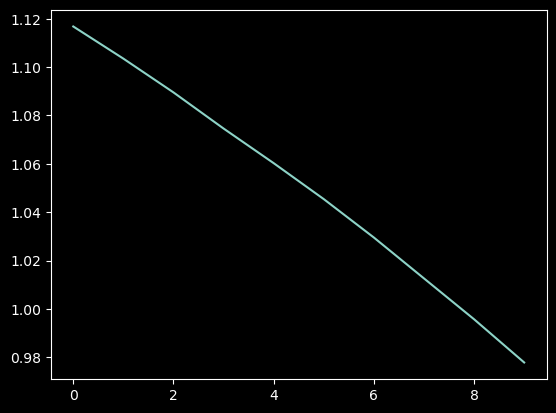

In [261]:
plt.plot(history.history["loss"])